In [54]:
import pandas as pd
import numpy as np

In [55]:
dataset = pd.read_csv("./data/players_22.csv")
features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']

dataset = dataset.dropna(subset= features)
data = dataset[features].copy()
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

C:\Users\Iago Barretto Soares\AppData\Local\Temp\ipykernel_12380\1463430685.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("./data/players_22.csv")


In [56]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [57]:
def get_label(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [58]:
def new_centroids(data, labels, k): 
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot
from IPython.display import clear_output

In [60]:
def plotting(data, centroids, labels, iteration):
    pca =PCA(n_components= 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)

    plot.title(f'Iteration {iteration}')
    plot.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plot.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plot.show()

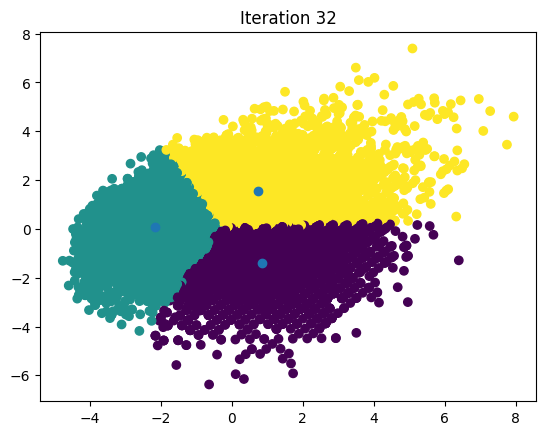

In [61]:
k= 3
max_iterations = 100

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_label(data, centroids)
    centroids = new_centroids(data, labels, k)

    plotting(data, centroids, labels, iteration)
    iteration +=1